# **Chart_Studio Plotly + Cufflinks**
___
___

***Topics***

*   Dataset idea using pandas plot
*   Imports and Initializations
*   **Function for vizualizing in Google Colab**
*   Histogram on one column
*   **Percentage** distribution histogram
*   **Normalized** Histogram (Probability Density)
*   Histogram with **Multple Group / Feature / Attribute**




In [1]:
!pip install cufflinks chart_studio plotly

     |████████████████████████████████| 71kB 3.0MB/s 


## Import List

In [2]:
# plotly imports
import plotly.graph_objs as go
import chart_studio.plotly as py
# Cufflinks wrapper on plotly
import cufflinks as cf

import pandas as pd
import numpy as np

%matplotlib inline

# Options for pandas
pd.options.display.max_columns = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Initializations

**This function is required for GOOGLE COLAB plotly view**
Need to call the following line in **every cell** if it contains vizualization code

`configure_plotly_browser_state()`

`init_notebook_mode(connected=False)`

In [3]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [4]:
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline(connected=True)

# Set global theme
cf.set_config_file(world_readable=True, theme='pearl')

## Data

In [5]:
df = pd.read_csv('olympics.csv', skiprows=1)
df = df[:(len(df)-1)]
df.head()

,Unnamed: 0,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [6]:
for col in df.columns:
    if col[:2]=='01':
        df.rename(columns={col:'Gold' + col[4:]}, inplace=True)
    if col[:2]=='02':
        df.rename(columns={col:'Silver' + col[4:]}, inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronze' + col[4:]}, inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'#' + col[1:]}, inplace=True) 

print(df.head(2))
print(df.describe())

          Unnamed: 0  # Summer  Gold  Silver  Bronze  Total  # Winter  Gold.1  \
0  Afghanistan (AFG)        13     0       0       2      2         0       0   
1      Algeria (ALG)        12     5       2       8     15         3       0   

   Silver.1  Bronze.1  Total.1  # Games  Gold.2  Silver.2  Bronze.2  \
0         0         0        0       13       0         0         2   
1         0         0        0       15       5         2         8   

   Combined total  
0               2  
1              15  
         # Summer        Gold      Silver      Bronze        Total  \
count  146.000000  146.000000  146.000000  146.000000   146.000000   
mean    13.383562   32.938356   32.705479   35.136986   100.780822   
std      7.006657   96.745184   80.648421   77.118416   252.700436   
min      1.000000    0.000000    0.000000    0.000000     0.000000   
25%      8.000000    0.000000    1.000000    1.000000     2.000000   
50%     13.000000    3.000000    4.000000    6.000000    12.00

Pandas plot

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,5))
data = df['Combined total']
data.plot.hist(bins=10)

Kinds of Plots:

   scatter, bar, box, spread
   ratio, heatmap, surface
   histogram, bubble, bubble3d
   scatter3d, scattergeo, ohlc
   candle, pie, choroplet

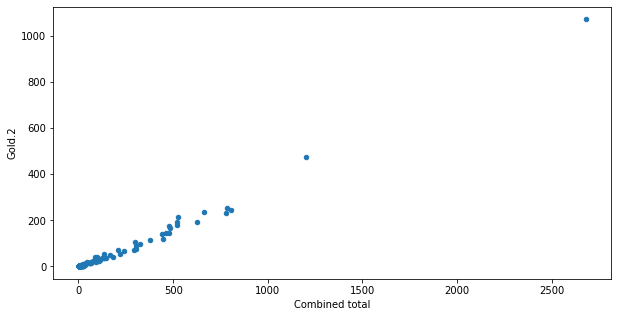

In [8]:
df.plot(x='Combined total', y='Gold.2', kind='scatter', figsize=(10,5))

## **Plotly Histogram**

In [ ]:
####### These Lines are important for Google Colab ######
configure_plotly_browser_state()
init_notebook_mode(connected=False)
####### Without these lines figure will be null ######


df['Combined total'].iplot(
    kind='hist',
    bins=20,
    xTitle='Combined Total',
    linecolor='blue',
    yTitle='Total',
    title='Total Medal Distribution')

⚠️*Comment: 121 countries won less than 190 medals in total*

## **Percentage Histogram**

In [ ]:
####### These Lines are important for Google Colab ######
configure_plotly_browser_state()
init_notebook_mode(connected=False)
####### Without these lines figure will be null ######

df['Combined total'].iplot(
    kind='hist',
    bins=30,
    xTitle='Total Medals',
    linecolor='black',
    histnorm='percent',
    yTitle='percentage (%)',
    title='Medal Distribution')

⚠️*Comment: Whole Combined Medal numbers are distributed among 30 slots. 75+ percent country won less than 100 medals in total*

In [ ]:
####### These Lines are important for Google Colab ######
configure_plotly_browser_state()
init_notebook_mode(connected=False)
####### Without these lines figure will be null ######

df['Gold'].iplot(
    kind='hist',
    bins=10,
    xTitle='Gold Medals',
    linecolor='black',
    histnorm='percent',
    yTitle='percentage (%)',
    title='Summer Gold Medal Distribution')

⚠️*Comment: Equally distributed between 10 slots
90 Country won less than 100 Gold medals in summer*

## **Normalized Histogram**

In [ ]:
####### These Lines are important for Google Colab ######
configure_plotly_browser_state()
init_notebook_mode(connected=False)
####### Without these lines figure will be null ######

df['Gold'].iplot(
    kind='hist',
    bins=10,
    xTitle='Gold Medals',
    linecolor='black',
    histnorm='probability density',
    yTitle='percentage (%)',
    title='Summer Gold Medal Distribution')

⚠️*Normalization with probability density. histnorm attribute is changed.*

## **Histogram with Multple Group / Feature /Attribute**

In [ ]:
####### These Lines are important for Google Colab ######
configure_plotly_browser_state()
init_notebook_mode(connected=False)
####### Without these lines figure will be null ######

df[['Gold', 'Gold.1', 'Combined total']].iplot(
    kind='hist',
    linecolor='black',
    bins=20,
    histnorm='percent',
    bargap=0.1,
    opacity=0.8,
    barmode='group',
    xTitle='Medals',
    yTitle='Percentage (%)',
    title='Compare Summer Gold Medals, Winter Gold Medal and Total Medal')

⚠️*Comment: Total number of medals divided into 20 slots. A comparison is given among Gold medals from summer, Gold medals from winter, and total gold medals. Naturally, no surprise there.*